In [1]:
%matplotlib inline

import os
import re
import pandas as pd
import numpy as np
import zipfile as zipfile
import shutil
import random
from pathlib import Path

from fastai.vision import *
from fastai.metrics import error_rate

In [2]:
path = Path(os.getcwd())/"data"
path

WindowsPath('C:/Users/4euge/SysLab/data')

In [6]:
tfms = get_transforms()
data = ImageDataBunch.from_folder(path,test="test",ds_tfms=tfms,bs=16, size=224)

In [7]:
print(data)
print(data.classes)

ImageDataBunch;

Train: LabelList (3078 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
backpack,backpack,backpack,backpack,backpack
Path: C:\Users\4euge\SysLab\data;

Valid: LabelList (1027 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
backpack,backpack,backpack,backpack,backpack
Path: C:\Users\4euge\SysLab\data;

Test: LabelList (1032 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: EmptyLabelList
,,,,
Path: C:\Users\4euge\SysLab\data
['backpack', 'binder', 'book', 'cardboard', 'glass', 'metal', 'paper', 'pen', 'pencil_case', 'plastic', 'shoe', 'trash']


In [8]:
learner = cnn_learner(data,models.resnet50,metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to C:\Users\4euge/.cache\torch\hub\checkpoints\resnet50-19c8e357.pth


epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


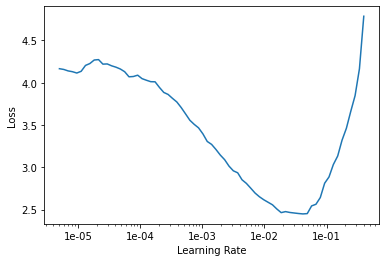

In [9]:
learner.lr_find(start_lr=1e-6,end_lr=1e1)
learner.recorder.plot()

In [10]:
#find optimum learning rate
lr_diff = 15
loss_threshold = .05 
adjust_value = 1
plot = False
lrs = learner.recorder.lrs
losses = np.array(learner.recorder.losses)
assert(lr_diff < len(losses))
loss_grad = np.gradient(losses)

r_idx = -1
l_idx = r_idx - lr_diff
while (l_idx >= -len(losses)) and (abs(loss_grad[r_idx] - loss_grad[l_idx]) > loss_threshold):
    local_min_lr = lrs[l_idx]
    r_idx -= 1
    l_idx -= 1

lr_to_use = local_min_lr * adjust_value
print(lr_to_use)

0.0037153522909717258


In [12]:
learner.fit_one_cycle(20,max_lr=lr_to_use)

epoch,train_loss,valid_loss,error_rate,time
0,0.913212,0.382989,0.126582,38:09
1,0.754957,0.424802,0.121714,37:25
2,0.680404,0.557162,0.172347,37:14
3,0.834508,0.556646,0.167478,26:52
4,0.867562,0.679151,0.188900,18:13
5,0.853781,0.697102,0.200584,1:26:51
6,0.759275,0.941240,0.259007,1:48:29
7,0.740705,0.602841,0.165531,1:25:58
8,0.622837,0.455565,0.139241,1:26:55
9,0.553788,0.495071,0.148978,1:25:49


In [13]:
learner.export('models/fastai_all_class.pkl')

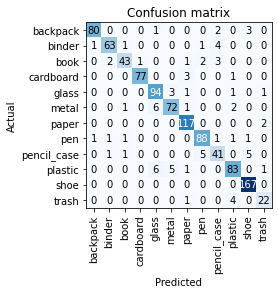

In [14]:
#confusion matrix
interp = ClassificationInterpretation.from_learner(learner)
interp.plot_confusion_matrix()